In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
DATA = pd.read_csv('dataset-activity1.csv',delimiter = ';')

c:\users\gosha\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Предварительный взгляд на набор данных

In [ ]:

plt.figure(  figsize=(6,6) )
plt.title('Испытуемый -debora Действие  - sitting Координата x1 (Талия)')
plt.grid(True)
plt.plot(deb_sit_x1.index ,deb_sit_x1 )

<AxesSubplot:title={'center':'Распределение классов в наборе данных'}, xlabel='class'>

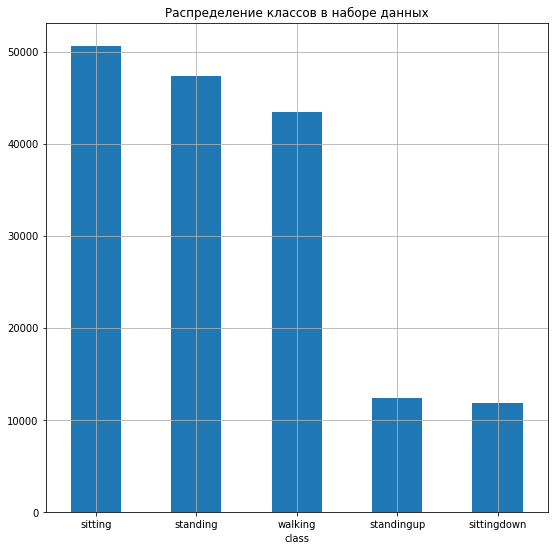

In [87]:
 DATA.value_counts('class').plot(kind = 'bar',figsize = (9,9),grid = True,title = 'Распределение классов в наборе данных',rot = 0)
 

In [44]:
names = (DATA.value_counts('user')).index
cols = s['katia'].index 
vals = [s[i].values for i in names] 

In [47]:
users_and_classes = pd.DataFrame(vals , index = names,columns = cols)

In [48]:
users_and_classes

class,sitting,standing,walking,sittingdown,standingup
user,,,,,
debora,15615,14940,13622,3853,3547
wallace,14993,14467,14037,4115,3486
katia,14280,14234,13556,4017,3710
jose_carlos,5743,3729,2175,777,737


<AxesSubplot:title={'center':'Распределение классов для испытуемого debora'}, xlabel='class'>

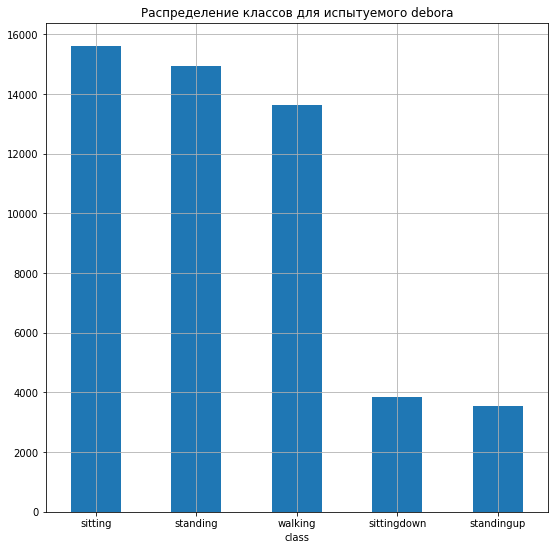

In [83]:
users_and_classes.loc['debora'].plot(kind = 'bar',figsize = (9,9),grid = True,title = 'Распределение классов для испытуемого debora',rot = 0)

<AxesSubplot:title={'center':'Распределение классов для испытуемого jose_carlos'}, xlabel='class'>

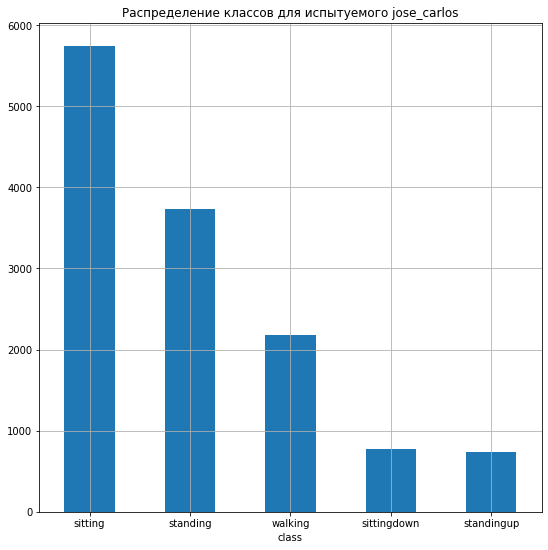

In [82]:
users_and_classes.loc['jose_carlos'].plot(kind = 'bar',figsize = (9,9),grid = True,title = 'Распределение классов для испытуемого jose_carlos',rot = 0)

<AxesSubplot:title={'center':'Распределение классов для испытуемого wallace'}, xlabel='class'>

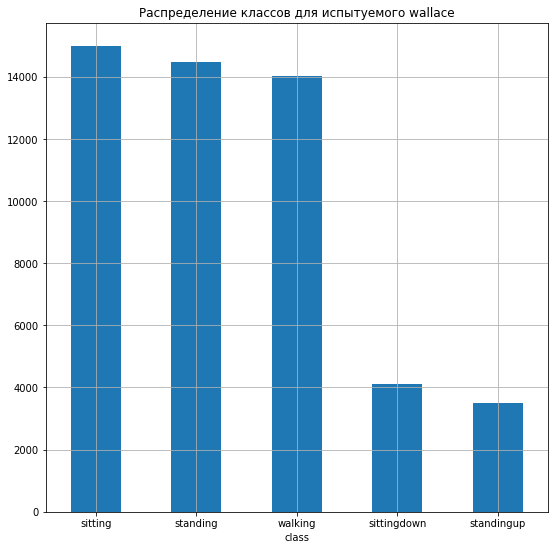

In [81]:
 users_and_classes.loc['wallace'].plot(kind = 'bar',figsize = (9,9),grid = True,title = 'Распределение классов для испытуемого wallace',rot = 0)

<AxesSubplot:title={'center':'Распределение классов для испытуемого katia'}, xlabel='class'>

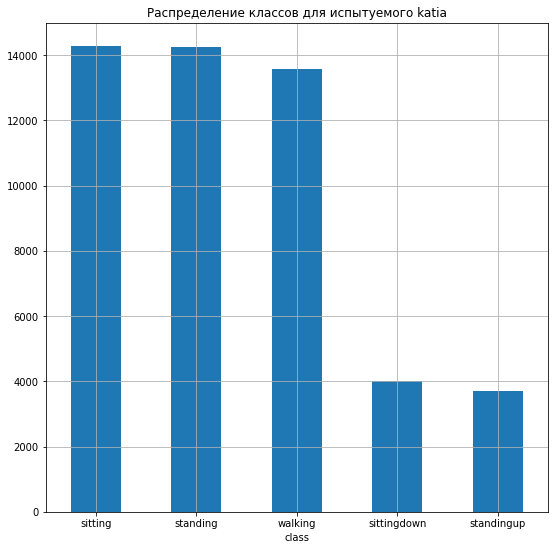

In [84]:
users_and_classes.loc['katia'].plot(kind = 'bar',figsize = (9,9),grid = True,title = 'Распределение классов для испытуемого katia',rot = 0)

<AxesSubplot:title={'center':'Распределение классов для всех испытуемых'}, xlabel='user'>

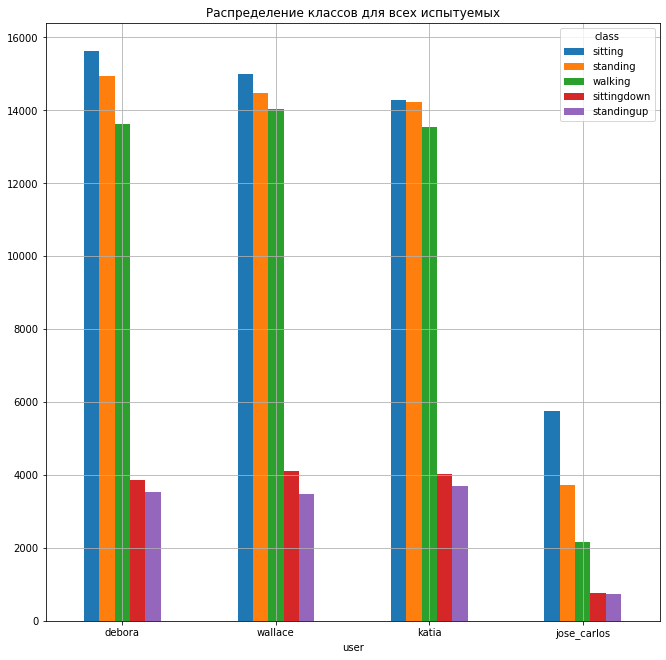

In [85]:
users_and_classes.plot(kind = 'bar',rot = 0,figsize = (11,11),grid = True, title = 'Распределение классов для всех испытуемых')

In [86]:
DATA.head(10)

,user,gender,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,class
0,debora,Woman,46,"1,62",75,"28,6",-3,92,-63,-23,18,-19,5,104,-92,-150,-103,-147,sitting
1,debora,Woman,46,"1,62",75,"28,6",-3,94,-64,-21,18,-18,-14,104,-90,-149,-104,-145,sitting
2,debora,Woman,46,"1,62",75,"28,6",-1,97,-61,-12,20,-15,-13,104,-90,-151,-104,-144,sitting
3,debora,Woman,46,"1,62",75,"28,6",-2,96,-57,-15,21,-16,-13,104,-89,-153,-103,-142,sitting
4,debora,Woman,46,"1,62",75,"28,6",-1,96,-61,-13,20,-15,-13,104,-89,-153,-104,-143,sitting
5,debora,Woman,46,"1,62",75,"28,6",-2,95,-62,-14,19,-16,-13,104,-89,-153,-104,-142,sitting
6,debora,Woman,46,"1,62",75,"28,6",1,100,-62,-10,22,-12,-13,104,-90,-151,-104,-143,sitting
7,debora,Woman,46,"1,62",75,"28,6",-1,97,-63,-13,20,-15,-12,104,-88,-151,-104,-142,sitting
8,debora,Woman,46,"1,62",75,"28,6",-1,98,-63,-14,19,-17,-13,104,-90,-152,-103,-144,sitting
9,debora,Woman,46,"1,62",75,"28,6",0,98,-61,-11,22,-13,-13,104,-90,-151,-104,-144,sitting


Выборка по классам несбалансированная. Это влияет на выбор метрики качества классификации.

Визуализация сигнала акселерометров

In [5]:
usr_dt = DATA[DATA['class'] == 'sitting'][['user','x1', 'y1', 'z1', 'x2', 'y2', 'z2', 'x3', 'y3', 'z3', 'x4', 'y4', 'z4']]

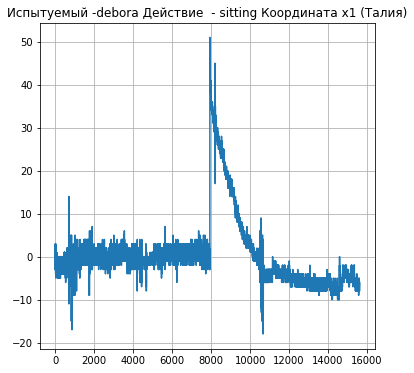

In [7]:
plt.figure(  figsize=(6,6) )
plt.title('Испытуемый -debora Действие  - sitting Координата x1 (Талия)')
plt.grid(True)
plt.plot(deb_sit_x1.index ,deb_sit_x1 )


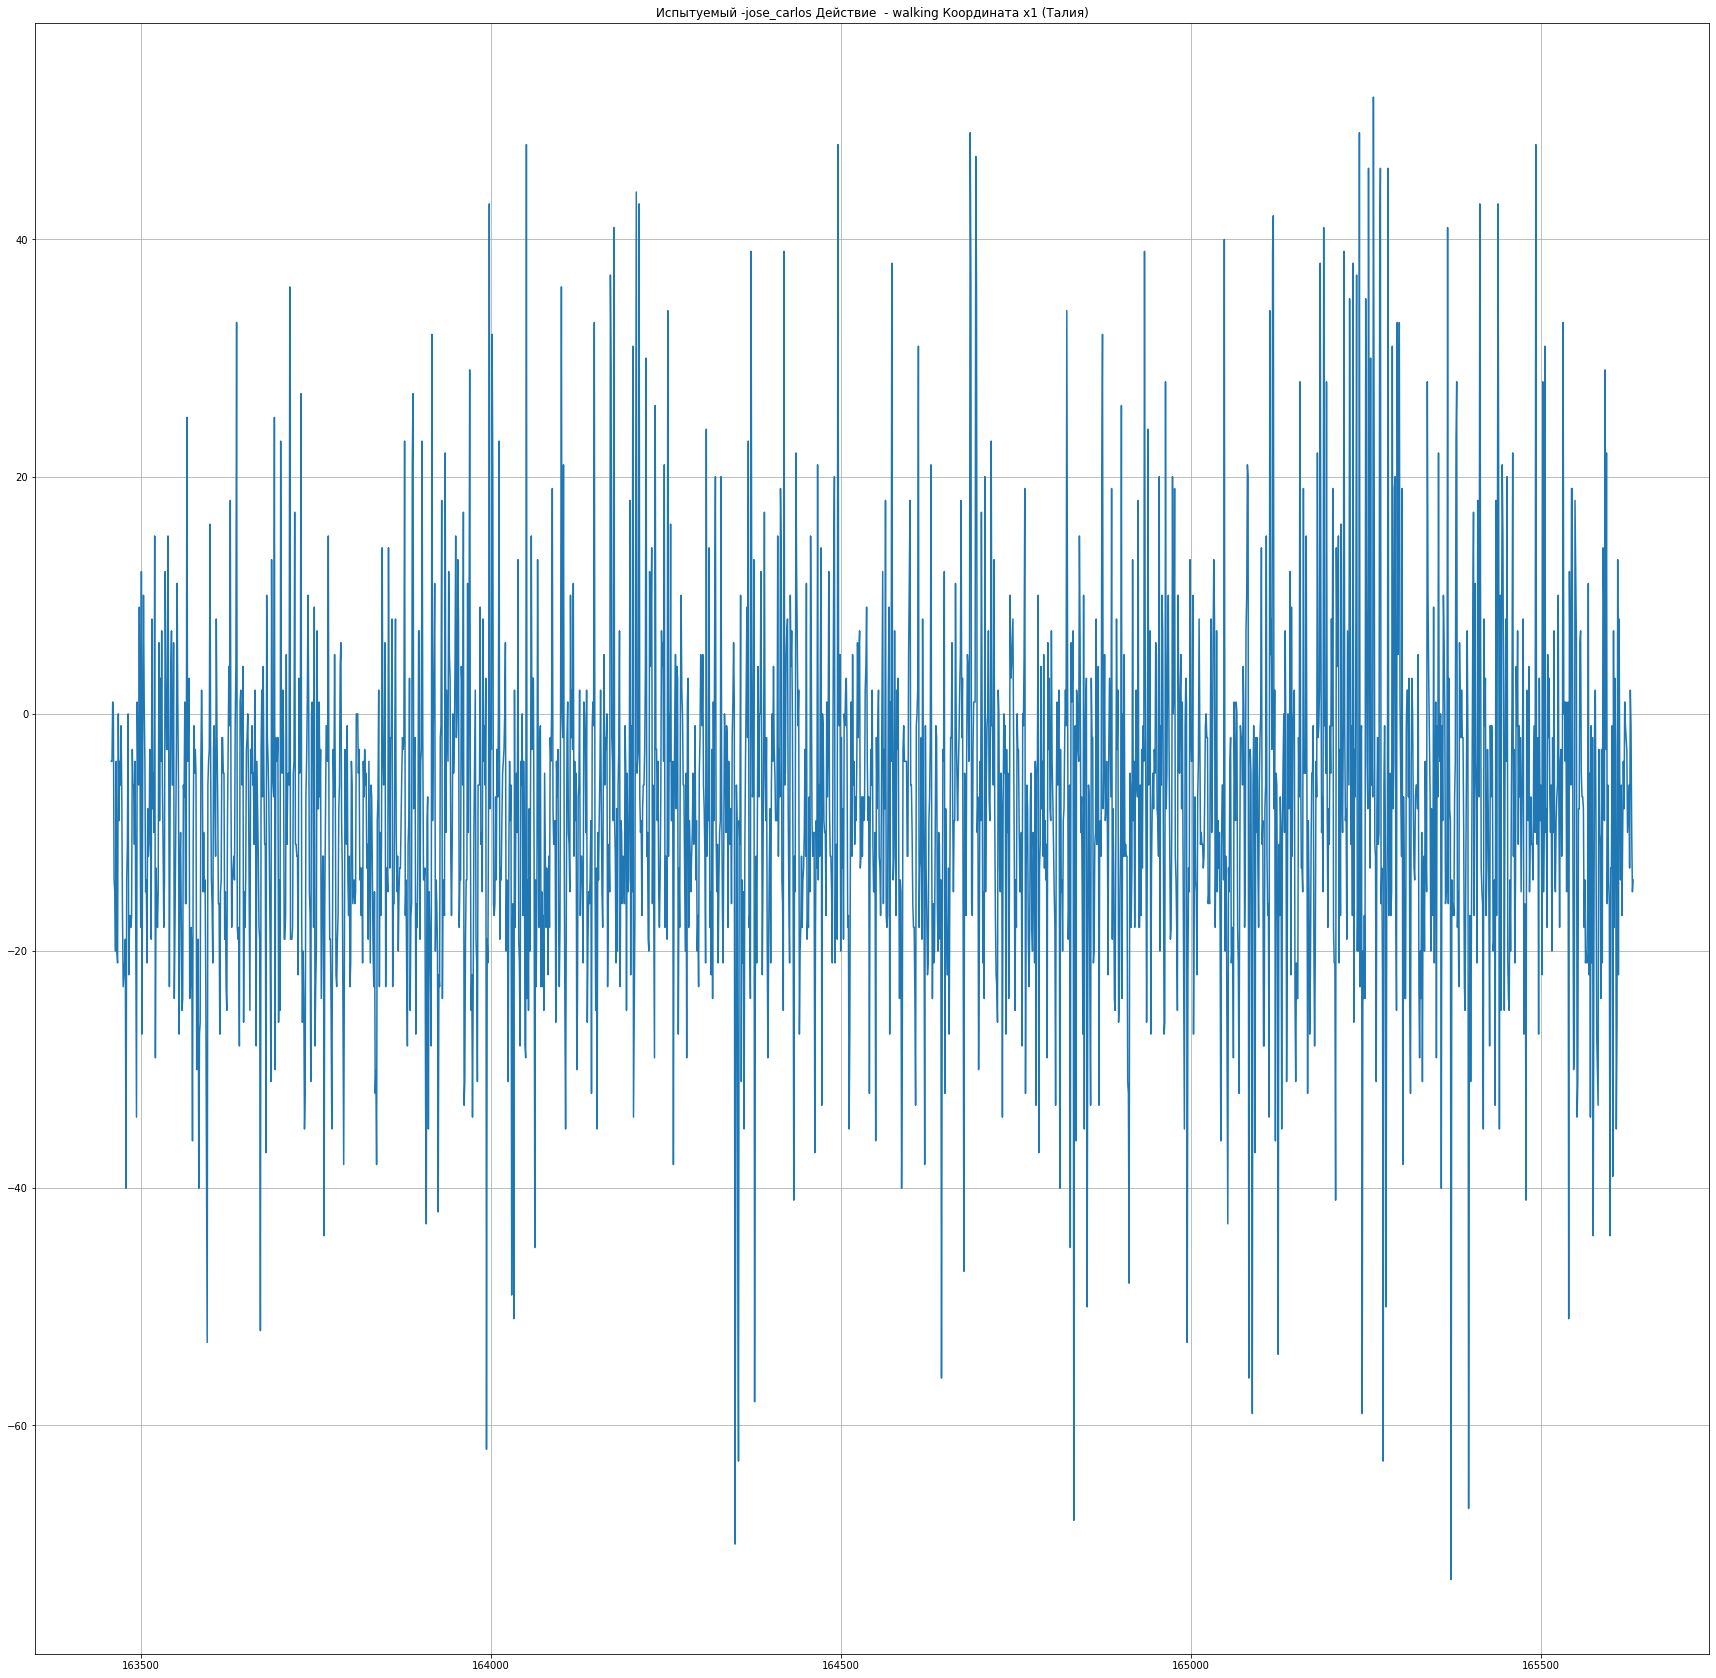

In [31]:
plt.figure(  figsize=(30,30) )
plt.title('Испытуемый -jose_carlos Действие  - walking Координата x1 (Талия)')
plt.grid(True)
 
plt.plot(jose_walk_x1.index ,jose_walk_x1)

In [5]:
deb_sit_x1 =   DATA[(DATA['user'] == 'debora') & (DATA['class'] == 'sitting')]['x1'] 
   

Обработка сигналов. Сигнал интерпретируется как времянной ряд. Для работы с ним использовались соответствующие приемы.

Нужно очистить сигнал от шумов.
Для этого нужно выполнить STL разложение. А перед этим найти период.

Период сигнала ищется методом идентификации почти-периодов (разработан проф.  В. И. Кузьминым.)

In [2]:
def iskl_trend(data , dt):
    length_data = data.shape[0]
    ANS = np.array([0 for i in range(length_data )])
    data = data + np.abs(data.min()) + 1
    for t in range(dt,length_data - dt):
        ANS[t] = np.log( (data[t-dt]*data[t+dt]) /(data[t]*data[t]))
 
    return ANS
 
    

In [3]:

def sdvg(data_sdvg, tay): 
    summ = 0
    for t in range(data_sdvg.shape[0]-tay):
        summ+= np.abs(data_sdvg[t+tay] - data_sdvg[t])
    summ = summ /(data_sdvg.shape[0]-tay)
    return summ

In [23]:
from statsmodels.tsa.seasonal import STL

In [6]:
coords= [ 'x1','y1', 'z1', 'x2', 'y2', 'z2', 'x3', 'y3', 'z3', 'x4', 'y4', 'z4']

In [37]:
#испытуемый debora все классы
deb_sit_coords_trend =[]
deb_stand_coords_trend = []
deb_walk_coords_trend = []
deb_standup_coords_trend = []
deb_sitdown_coords_trend = []
#первые 2 для sitting и standing
coords= [ 'x1','y1', 'z1', 'x2', 'y2', 'z2', 'x3', 'y3', 'z3', 'x4', 'y4', 'z4']

In [26]:
classes = ['sitting','standing','walking','standingup','sittingdown']


In [27]:
kat_sit_coords_trend =[]
kat_stand_coords_trend = []
kat_walk_coords_trend = []
kat_standup_coords_trend = []
kat_sitdown_coords_trend = []

In [28]:
print(classes[0],end=':   ')
for i in coords:
    A= np.array( DATA[(DATA['user'] == 'katia') & (DATA['class'] == classes[0])][i] )
    stl =  STL(A , period=33)
    res = stl.fit()
    DECOMP = res.trend
    kat_sit_coords_trend.append( DECOMP)
    print('#',end='')
print()
print(classes[1],end=':   ')
for i in coords:
    A= np.array( DATA[(DATA['user'] == 'katia') & (DATA['class'] == classes[1])][i] )
    stl =  STL(A , period=33)
    res = stl.fit()
    DECOMP = res.trend
    kat_stand_coords_trend.append( DECOMP)
    print('#',end='')
print()

print(classes[2],end=':   ')
for i in coords:
    A= np.array( DATA[(DATA['user'] == 'katia') & (DATA['class'] == classes[2])][i] )
    stl =  STL(A , period=33)
    res = stl.fit()
    DECOMP = res.trend
    kat_walk_coords_trend.append( DECOMP)
    print('#',end='')
print()

print(classes[3],end=':   ')
for i in coords:
    A= np.array( DATA[(DATA['user'] == 'katia') & (DATA['class'] == classes[3])][i] )
    stl =  STL(A , period=33)
    res = stl.fit()
    DECOMP = res.trend
    kat_standup_coords_trend.append( DECOMP)
    print('#',end='')
print()

print(classes[4],end=':   ')
for i in coords:
    A= np.array( DATA[(DATA['user'] == 'katia') & (DATA['class'] == classes[4])][i] )
    stl =  STL(A , period=33)
    res = stl.fit()
    DECOMP = res.trend
    kat_sitdown_coords_trend.append( DECOMP)
    print('#',end='')
print()

sitting:   ############
standing:   ############
walking:   ############
standingup:   ############
sittingdown:   ############


In [29]:
wal_sit_coords_trend =[]
wal_stand_coords_trend = []
wal_walk_coords_trend = []
wal_standup_coords_trend = []
wal_sitdown_coords_trend = []
coords= [ 'x1','y1', 'z1', 'x2', 'y2', 'z2', 'x3', 'y3', 'z3', 'x4', 'y4', 'z4']

In [30]:
print(classes[0],end=':   ')
for i in coords:
    A= np.array( DATA[(DATA['user'] == 'wallace') & (DATA['class'] == classes[0])][i] )
    stl =  STL(A , period=33)
    res = stl.fit()
    DECOMP = res.trend
    wal_sit_coords_trend.append( DECOMP)
    print('#',end='')
print()
print(classes[1],end=':   ')
for i in coords:
    A= np.array( DATA[(DATA['user'] == 'wallace') & (DATA['class'] == classes[1])][i] )
    stl =  STL(A , period=33)
    res = stl.fit()
    DECOMP = res.trend
    wal_stand_coords_trend.append( DECOMP)
    print('#',end='')
print()

print(classes[2],end=':   ')
for i in coords:
    A= np.array( DATA[(DATA['user'] == 'wallace') & (DATA['class'] == classes[2])][i] )
    stl =  STL(A , period=33)
    res = stl.fit()
    DECOMP = res.trend
    wal_walk_coords_trend.append( DECOMP)
    print('#',end='')
print()

print(classes[3],end=':   ')
for i in coords:
    A= np.array( DATA[(DATA['user'] == 'wallace') & (DATA['class'] == classes[3])][i] )
    stl =  STL(A , period=33)
    res = stl.fit()
    DECOMP = res.trend
    wal_standup_coords_trend.append( DECOMP)
    print('#',end='')
print()

print(classes[4],end=':   ')
for i in coords:
    A= np.array( DATA[(DATA['user'] == 'wallace') & (DATA['class'] == classes[4])][i] )
    stl =  STL(A , period=33)
    res = stl.fit()
    DECOMP = res.trend
    wal_sitdown_coords_trend.append( DECOMP)
    print('#',end='')
print()

sitting:   ############
standing:   ############
walking:   ############
standingup:   ############
sittingdown:   ############


In [31]:
js_sit_coords_trend =[]
js_stand_coords_trend = []
js_walk_coords_trend = []
js_standup_coords_trend = []
js_sitdown_coords_trend = []
coords= [ 'x1','y1', 'z1', 'x2', 'y2', 'z2', 'x3', 'y3', 'z3', 'x4', 'y4', 'z4']

In [32]:
print(classes[0],end=':   ')
for i in coords:
    A= np.array( DATA[(DATA['user'] == 'jose_carlos') & (DATA['class'] == classes[0])][i] )
    stl =  STL(A , period=33)
    res = stl.fit()
    DECOMP = res.trend
    js_sit_coords_trend.append( DECOMP)
    print('#',end='')
print()
print(classes[1],end=':   ')
for i in coords:
    A= np.array( DATA[(DATA['user'] == 'jose_carlos') & (DATA['class'] == classes[1])][i] )
    stl =  STL(A , period=33)
    res = stl.fit()
    DECOMP = res.trend
    js_stand_coords_trend.append( DECOMP)
    print('#',end='')
print()

print(classes[2],end=':   ')
for i in coords:
    A= np.array( DATA[(DATA['user'] == 'jose_carlos') & (DATA['class'] == classes[2])][i] )
    stl =  STL(A , period=33)
    res = stl.fit()
    DECOMP = res.trend
    js_walk_coords_trend.append( DECOMP)
    print('#',end='')
print()

print(classes[3],end=':   ')
for i in coords:
    A= np.array( DATA[(DATA['user'] == 'jose_carlos') & (DATA['class'] == classes[3])][i] )
    stl =  STL(A , period=33)
    res = stl.fit()
    DECOMP = res.trend
    js_standup_coords_trend .append( DECOMP)
    print('#',end='')
print()

print(classes[4],end=':   ')
for i in coords:
    A= np.array( DATA[(DATA['user'] == 'jose_carlos') & (DATA['class'] == classes[4])][i] )
    stl =  STL(A , period=33)
    res = stl.fit()
    DECOMP = res.trend
    js_sitdown_coords_trend.append( DECOMP)
    print('#',end='')
print()

sitting:   ############
standing:   ############
walking:   ############
standingup:   ############
sittingdown:   ############


In [33]:
wal_sit_coords_trend =np.array(  wal_sit_coords_trend )
wal_stand_coords_trend =np.array( wal_stand_coords_trend )
wal_walk_coords_trend =np.array(  wal_walk_coords_trend)
wal_standup_coords_trend = np.array( wal_standup_coords_trend )
wal_sitdown_coords_trend = np.array( wal_sitdown_coords_trend )

In [34]:
kat_sit_coords_trend =np.array( kat_sit_coords_trend )
kat_stand_coords_trend =np.array(  kat_stand_coords_trend )
kat_walk_coords_trend = np.array(  kat_walk_coords_trend )
kat_standup_coords_trend = np.array( kat_standup_coords_trend )
kat_sitdown_coords_trend = np.array( kat_sitdown_coords_trend )

In [35]:
js_sit_coords_trend = np.array(js_sit_coords_trend)
js_stand_coords_trend = np.array(js_stand_coords_trend )
js_walk_coords_trend =np.array(js_walk_coords_trend)
js_standup_coords_trend = np.array(js_standup_coords_trend)
js_sitdown_coords_trend = np.array(js_sitdown_coords_trend)

In [39]:
print(classes[0],end=':   ')
for i in coords:
    A= np.array( DATA[(DATA['user'] == 'debora') & (DATA['class'] == classes[0])][i] )
    stl =  STL(A , period=33)
    res = stl.fit()
    DECOMP = res.trend
    deb_sit_coords_trend.append( DECOMP)
    print('#',end='')
print()
print(classes[1],end=':   ')
for i in coords:
    A= np.array( DATA[(DATA['user'] == 'debora') & (DATA['class'] == classes[1])][i] )
    stl =  STL(A , period=33)
    res = stl.fit()
    DECOMP = res.trend
    deb_stand_coords_trend.append( DECOMP)
    print('#',end='')
print()

print(classes[2],end=':   ')
for i in coords:
    A= np.array( DATA[(DATA['user'] == 'debora') & (DATA['class'] == classes[2])][i] )
    stl =  STL(A , period=33)
    res = stl.fit()
    DECOMP = res.trend
    deb_walk_coords_trend.append( DECOMP)
    print('#',end='')
print()

print(classes[3],end=':   ')
for i in coords:
    A= np.array( DATA[(DATA['user'] == 'debora') & (DATA['class'] == classes[3])][i] )
    stl =  STL(A , period=33)
    res = stl.fit()
    DECOMP = res.trend
    deb_standup_coords_trend.append( DECOMP)
    print('#',end='')
print()

print(classes[4],end=':   ')
for i in coords:
    A= np.array( DATA[(DATA['user'] == 'debora') & (DATA['class'] == classes[4])][i] )
    stl =  STL(A , period=33)
    res = stl.fit()
    DECOMP = res.trend
    deb_sitdown_coords_trend.append( DECOMP)
    print('#',end='')
print()

sitting:   ############
standing:   ############
walking:   ############
standingup:   ############
sittingdown:   ############


In [40]:
deb_sit_coords_trend =np.array(deb_sit_coords_trend )
deb_stand_coords_trend =np.array(deb_stand_coords_trend )
deb_walk_coords_trend = np.array(deb_walk_coords_trend )
deb_standup_coords_trend =np.array(deb_standup_coords_trend )
deb_sitdown_coords_trend = np.array( deb_sitdown_coords_trend)

In [75]:
for i in range(12):
    DATA.loc[(DATA['user'] == 'debora') & (DATA['class'] == classes[0]) ,coords[i] ] = np.round(deb_sit_coords_trend[i],1)
for i in range(12):
    DATA.loc[(DATA['user'] == 'debora') & (DATA['class'] == classes[1]) ,coords[i] ] =np.round( deb_stand_coords_trend[i],1)
for i in range(12):
    DATA.loc[(DATA['user'] == 'debora') & (DATA['class'] == classes[2]) ,coords[i] ] = np.round(deb_walk_coords_trend[i],1)
for i in range(12):
    DATA.loc[(DATA['user'] == 'debora') & (DATA['class'] == classes[3]) ,coords[i] ] = np.round(deb_standup_coords_trend[i],1)
for i in range(12):
    DATA.loc[(DATA['user'] == 'debora') & (DATA['class'] == classes[4]) ,coords[i] ] = np.round(deb_sitdown_coords_trend[i],1)


In [76]:
 for i in range(12):
    DATA.loc[(DATA['user'] == 'jose_carlos') & (DATA['class'] == classes[0]) ,coords[i] ] = np.round(js_sit_coords_trend[i],1)
for i in range(12):
    DATA.loc[(DATA['user'] == 'jose_carlos') & (DATA['class'] == classes[1]) ,coords[i] ] = np.round(js_stand_coords_trend[i],1)
for i in range(12):
    DATA.loc[(DATA['user'] == 'jose_carlos') & (DATA['class'] == classes[2]) ,coords[i] ] = np.round(js_walk_coords_trend[i],1)
for i in range(12):
    DATA.loc[(DATA['user'] == 'jose_carlos') & (DATA['class'] == classes[3]) ,coords[i] ] =np.round(js_standup_coords_trend[i],1)
for i in range(12):
    DATA.loc[(DATA['user'] == 'jose_carlos') & (DATA['class'] == classes[4]) ,coords[i] ] = np.round(js_sitdown_coords_trend[i],1)


In [60]:
kat_act = [kat_sit_coords_trend,kat_stand_coords_trend,kat_walk_coords_trend,kat_standup_coords_trend,kat_sitdown_coords_trend]  
wal_act = [wal_sit_coords_trend,wal_stand_coords_trend , wal_walk_coords_trend,wal_standup_coords_trend,wal_sitdown_coords_trend]   

In [77]:
name = 'katia'
for k in range(4):
    for i in range(12):
        DATA.loc[(DATA['user'] == name) & (DATA['class'] == classes[k]) ,coords[i] ] = np.round(kat_act[k][i],1)
     

На графиках ниже показаны сигналы, очищенные от шумов. 

In [78]:
name = 'wallace'
for k in range(4):
    for i in range(12):
        DATA.loc[(DATA['user'] == name) & (DATA['class'] == classes[k]) ,coords[i] ] = np.round( wal_act[k][i],1)

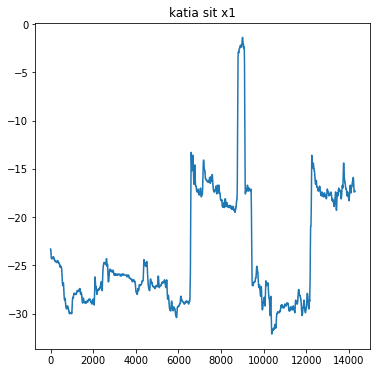

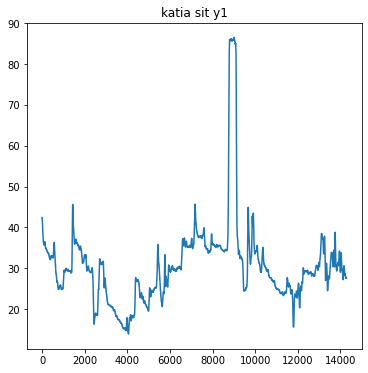

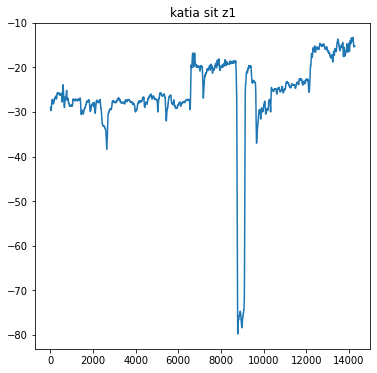

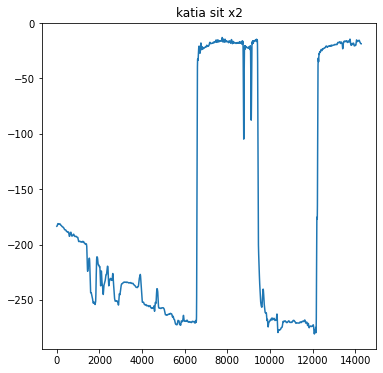

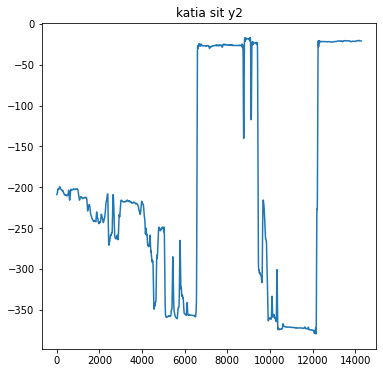

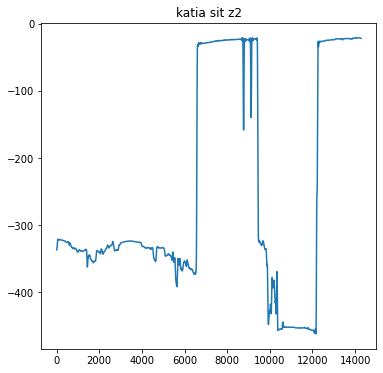

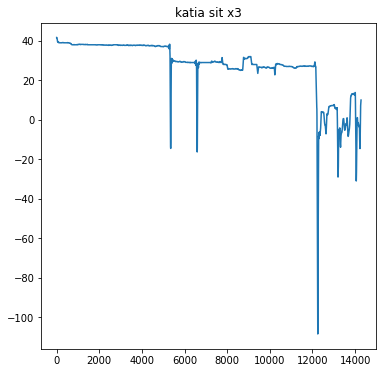

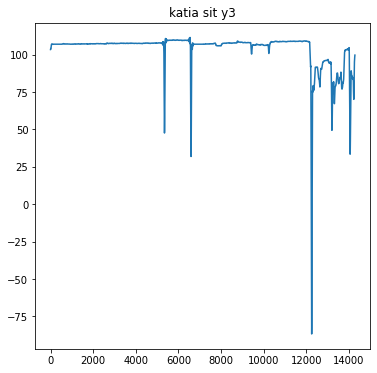

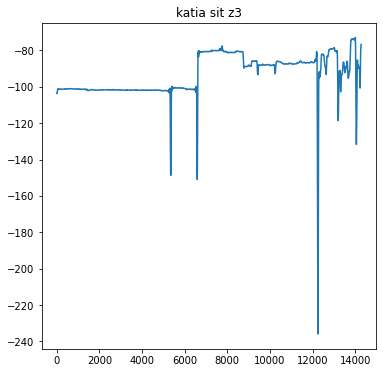

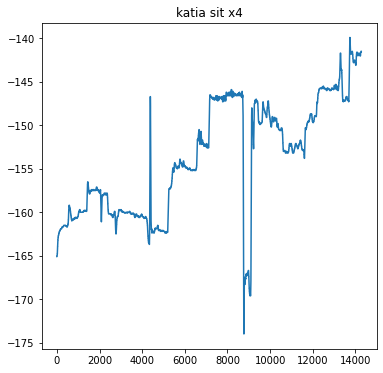

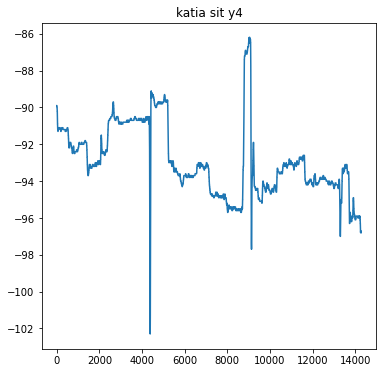

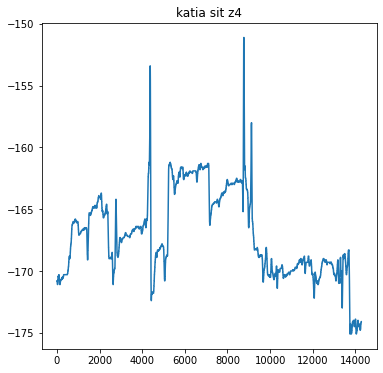

In [79]:
for i in coords:
    plt.figure(figsize = (6,6))
    plt.title('katia '+'sit '+i)
    plt.grid(True)
    plt.plot(np.array( DATA[ (DATA['user'] == 'katia') & (DATA['class'] == 'sitting') ][i] ))

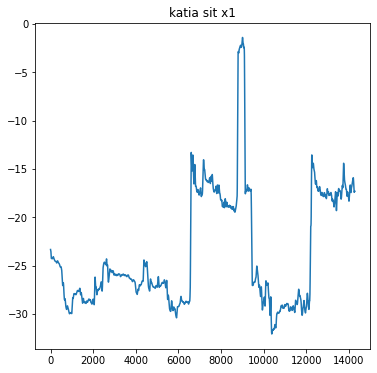

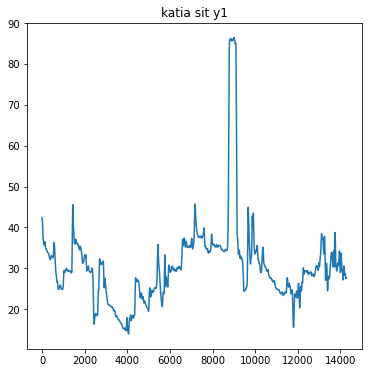

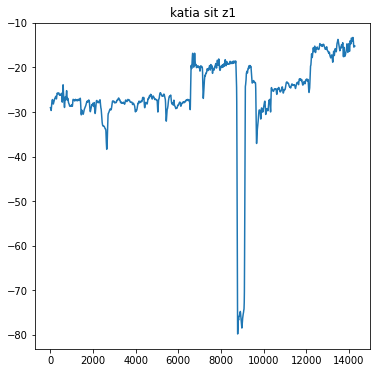

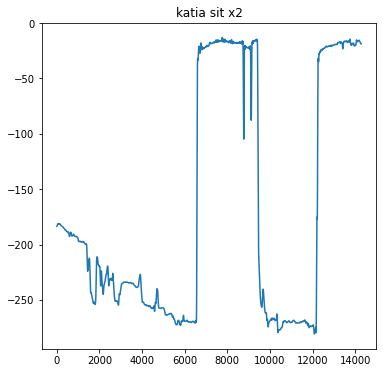

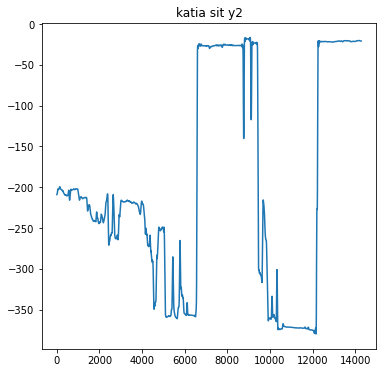

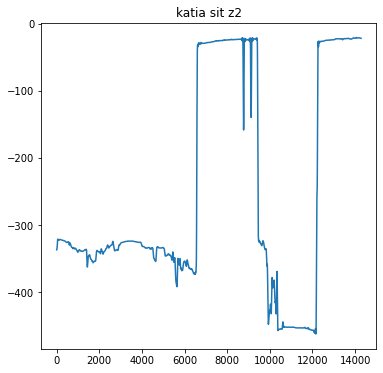

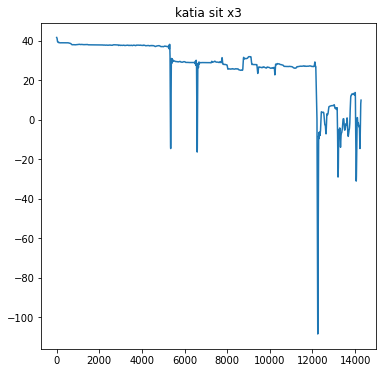

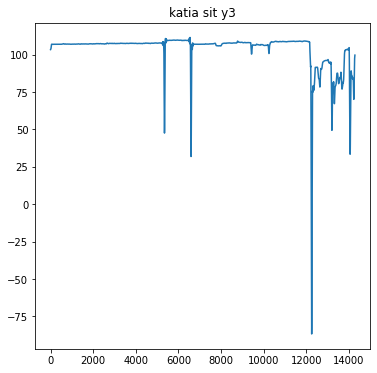

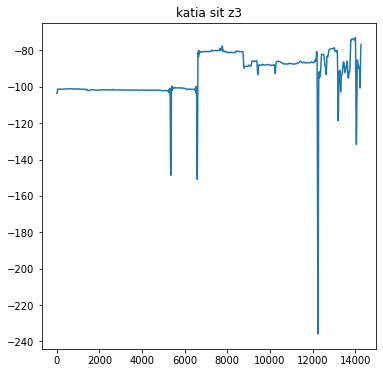

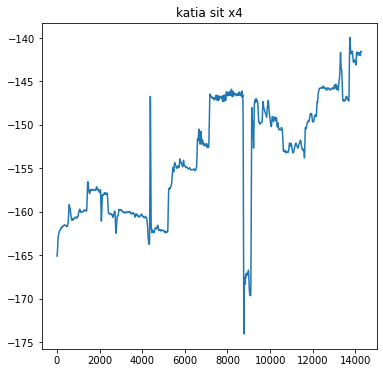

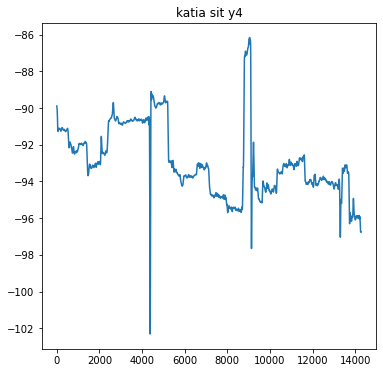

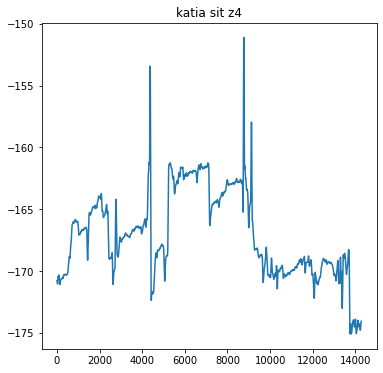

In [69]:
for i in range(12):
    plt.figure(figsize = (6,6))
    plt.title('katia '+'sit '+coords[i])
    plt.plot(kat_act[0][i] )

Теперь датасет содержит очищенные сигналы и его можно экспортировать в csv. И в дальнейшем работать с ним.

In [88]:
DATA.to_csv('denoised_data2.csv',sep =';',index = False) 

In [2]:
DATA1 = pd.read_csv('denoised_data2.csv',delimiter = ';')

In [86]:
DATA1.head(30)

,user,gender,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,class
0,debora,Woman,46,"1,62",75,"28,6",-0.7,97.3,-62.2,-13.0,20.2,-15.1,-12.6,104.3,-89.4,-158.8,-102.7,-142.2,sitting
1,debora,Woman,46,"1,62",75,"28,6",-0.7,97.3,-62.2,-13.0,20.2,-15.1,-12.6,104.3,-89.4,-158.9,-102.7,-142.1,sitting
2,debora,Woman,46,"1,62",75,"28,6",-0.7,97.3,-62.2,-13.0,20.2,-15.1,-12.6,104.3,-89.4,-158.9,-102.6,-142.1,sitting
3,debora,Woman,46,"1,62",75,"28,6",-0.7,97.3,-62.3,-13.0,20.2,-15.1,-12.6,104.3,-89.4,-159.0,-102.6,-142.1,sitting
4,debora,Woman,46,"1,62",75,"28,6",-0.7,97.3,-62.3,-13.0,20.2,-15.1,-12.6,104.3,-89.4,-159.1,-102.6,-142.1,sitting
5,debora,Woman,46,"1,62",75,"28,6",-0.7,97.3,-62.3,-12.9,20.2,-15.1,-12.6,104.3,-89.4,-159.1,-102.6,-142.1,sitting
6,debora,Woman,46,"1,62",75,"28,6",-0.7,97.3,-62.3,-12.9,20.2,-15.1,-12.6,104.3,-89.4,-159.2,-102.6,-142.1,sitting
7,debora,Woman,46,"1,62",75,"28,6",-0.7,97.4,-62.3,-12.9,20.2,-15.1,-12.6,104.3,-89.4,-159.2,-102.6,-142.0,sitting
8,debora,Woman,46,"1,62",75,"28,6",-0.8,97.4,-62.3,-12.9,20.2,-15.1,-12.6,104.3,-89.4,-159.3,-102.6,-142.0,sitting
9,debora,Woman,46,"1,62",75,"28,6",-0.8,97.4,-62.4,-12.9,20.2,-15.1,-12.7,104.3,-89.4,-159.4,-102.6,-142.0,sitting


In [93]:
qqq= np.array( DATA1[ 'x1' ])

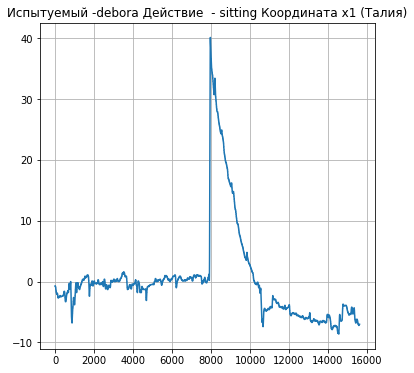

In [8]:
for i in coords[:1]:
    plt.figure(figsize = (6,6))
    plt.title('Испытуемый -debora Действие  - sitting Координата x1 (Талия)')
    plt.grid(True)
    plt.plot(np.array( DATA1[ (DATA1['user'] == 'debora') & (DATA['class'] == 'sitting') ][i] ))